## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_unit=10, num=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2,16,32,128,256]
MOMENTUM = 0.95

### 1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, batch_size in enumerate(BATCH_SIZE):
    keras.backend.clear_session()
    print("Experiment with Batch_size = %d" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch_size-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Batch_size = 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)     

50000/50000 [==============================] - 161s 3ms/step - loss: 2.2830 - acc: 0.1345 - val_loss: 2.3596 - val_acc: 0.1609
Epoch 50/50
50000/50000 [==============================] - 160s 3ms/step - loss: 2.2851 - acc: 0.1297 - val_loss: 2.5936 - val_acc: 0.1454
Experiment with Batch_size = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)  

50000/50000 [==============================] - 21s 415us/step - loss: 1.0963 - acc: 0.6114 - val_loss: 1.3928 - val_acc: 0.5216
Epoch 48/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.0949 - acc: 0.6121 - val_loss: 1.3867 - val_acc: 0.5205
Epoch 49/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.0860 - acc: 0.6152 - val_loss: 1.3577 - val_acc: 0.5288
Epoch 50/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.0850 - acc: 0.6139 - val_loss: 1.3682 - val_acc: 0.5266
Experiment with Batch_size = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (B

50000/50000 [==============================] - 11s 216us/step - loss: 0.8269 - acc: 0.7046 - val_loss: 1.5024 - val_acc: 0.5242
Epoch 46/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8144 - acc: 0.7120 - val_loss: 1.5334 - val_acc: 0.5113
Epoch 47/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.8104 - acc: 0.7082 - val_loss: 1.6499 - val_acc: 0.4825
Epoch 48/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8031 - acc: 0.7117 - val_loss: 1.5641 - val_acc: 0.5030
Epoch 49/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.7920 - acc: 0.7175 - val_loss: 1.5584 - val_acc: 0.5178
Epoch 50/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.7855 - acc: 0.7191 - val_loss: 1.5403 - val_acc: 0.5202
Experiment with Batch_size = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1

50000/50000 [==============================] - 5s 98us/step - loss: 0.3227 - acc: 0.8886 - val_loss: 2.2137 - val_acc: 0.4738
Epoch 44/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.3233 - acc: 0.8889 - val_loss: 2.4851 - val_acc: 0.4432
Epoch 45/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.3256 - acc: 0.8878 - val_loss: 2.3447 - val_acc: 0.4667
Epoch 46/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.3015 - acc: 0.8965 - val_loss: 2.2994 - val_acc: 0.4708
Epoch 47/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2897 - acc: 0.9013 - val_loss: 2.5004 - val_acc: 0.4611
Epoch 48/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.2782 - acc: 0.9050 - val_loss: 2.6518 - val_acc: 0.4390
Epoch 49/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.2589 - acc: 0.9133 - val_loss: 2.5022 - val_acc: 0.4601
Epoch 50/50
50000/50000 [===================

Epoch 42/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2718 - acc: 0.9180 - val_loss: 2.3066 - val_acc: 0.4647
Epoch 43/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.2549 - acc: 0.9247 - val_loss: 2.2421 - val_acc: 0.4773
Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.2441 - acc: 0.9289 - val_loss: 2.3097 - val_acc: 0.4707
Epoch 45/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2304 - acc: 0.9327 - val_loss: 2.3637 - val_acc: 0.4651
Epoch 46/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.2186 - acc: 0.9374 - val_loss: 2.2814 - val_acc: 0.4871
Epoch 47/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2120 - acc: 0.9390 - val_loss: 2.2805 - val_acc: 0.4644
Epoch 48/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.1921 - acc: 0.9466 - val_loss: 2.4052 - val_acc: 0.4698
Epoch 49/50
50000/50000 [=========

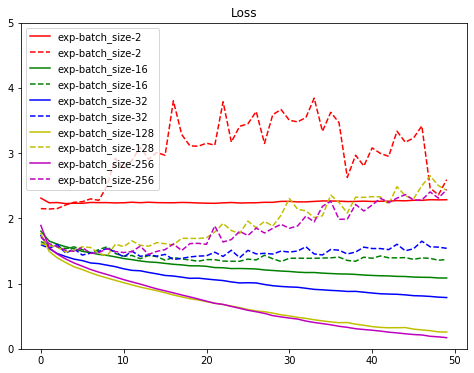

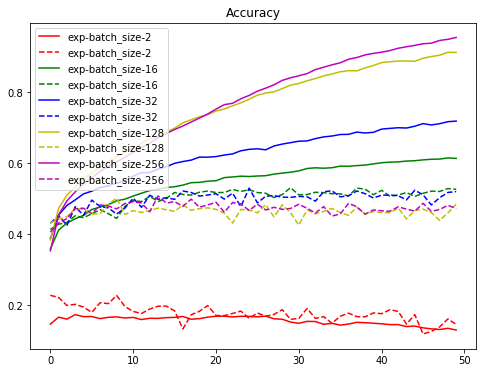

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果 (512)

In [9]:
def build_mlp_BeforeActivation(input_shape, output_unit=10, num=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [10]:
results = {}

keras.backend.clear_session()
print("Experiment with BatchNorm Before Activate")
model = build_mlp_BeforeActivation(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=512, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

exp_name_tag = "exp-batchnorm_before_activate"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Experiment with BatchNorm Before Activate
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None

50000/50000 [==============================] - 2s 50us/step - loss: 0.3092 - acc: 0.9195 - val_loss: 1.9350 - val_acc: 0.4881


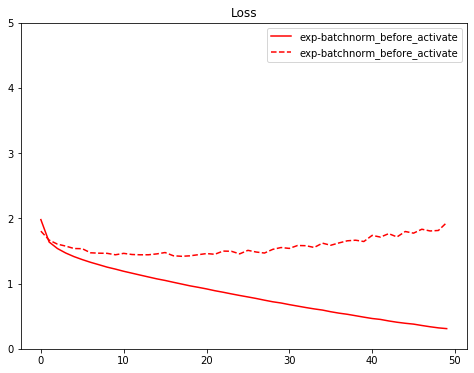

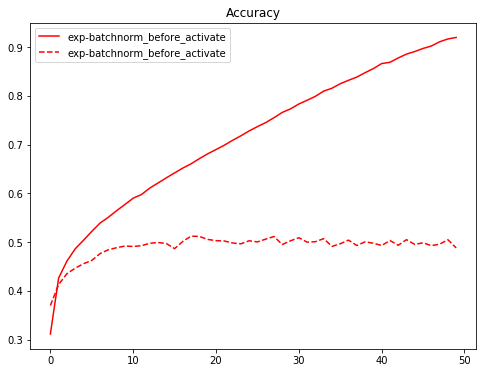

In [11]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 3. 請於 BN 放在 Input Layer 後，並比較結果

In [12]:
def build_mlp_AfterLayers(input_shape, output_unit=10, num=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [13]:
results = {}

keras.backend.clear_session()
print("Experiment with BatchNorm After Layers")
model = build_mlp_AfterLayers(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=512, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

exp_name_tag = "exp-batchnorm_after_layers"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Experiment with BatchNorm After Layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1

50000/50000 [==============================] - 3s 54us/step - loss: 0.0666 - acc: 0.9954 - val_loss: 2.3368 - val_acc: 0.4842
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0609 - acc: 0.9967 - val_loss: 2.3507 - val_acc: 0.4853
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.0565 - acc: 0.9970 - val_loss: 2.3692 - val_acc: 0.4844


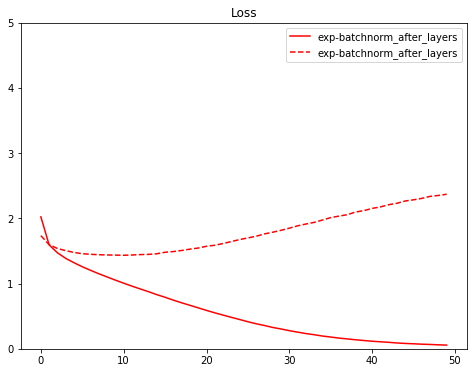

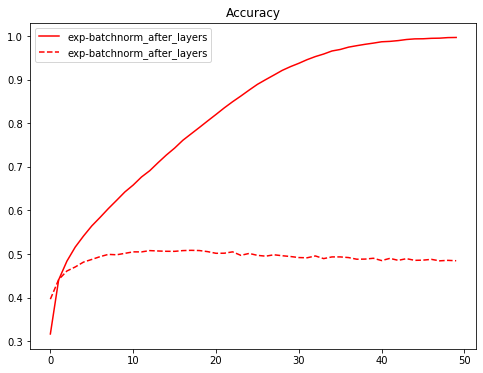

In [14]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()